In [185]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [186]:
# Reading excel file
ds = pd.read_excel('customer_retention_dataset.xlsx', sheet_name='datasheet', engine='openpyxl')
ds.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [187]:
# Checking the initial shape of the dataset as how many rows and columns are present in it
ds.shape

(269, 71)

In [188]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (269, 71)
Shape of dataset after removing duplicates:  (103, 71)


In [189]:
# Checking the columns of the dataset
ds.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [190]:
# Renaming columns
ds.rename(columns={"1Gender of respondent": "Gndr respondent", "2 How old are you? ": "Age",
                  "3 Which city do you shop online from?": "City shop",
                   "4 What is the Pin Code of where you shop online from?":"PinCode", 
                   "5 Since How Long You are Shopping Online ?":"Shopping period",
                  "6 How many times you have made an online purchase in the past 1 year?": "Year purchase frq",
                  "7 How do you access the internet while shopping on-line?":"Internet access", 
                  "8 Which device do you use to access the online shopping?":"Device shopping",
                  "9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ":"Screen mobile",
                  "10 What is the operating system (OS) of your device?\t\t\t\t                                          ":"OS device",
                  "11 What browser do you run on your device to access the website?\t\t\t                                                          ":"Browser",
                  "12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ":"Channel",
                  "13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ":"Next visit",
                  "14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ":"Explore time",
                  "15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ":"Prefered Payment",
                  "16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ":"Frq abandon",
                  "17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ":"Reason abandon",
                  "18 The content on the website must be easy to read and understand":"Content understand",
                  "19 Information on similar product to the one highlighted  is important for product comparison":"Comparison info",
                  "20 Complete information on listed seller and product being offered is important for purchase decision.":"Complete info",
                  "21 All relevant information on listed products must be stated clearly":"relevant info",
                  "22 Ease of navigation in website":"Navigation",
                  "23 Loading and processing speed":"Speed",
                  "24 User friendly Interface of the website":"Interface",
                  "25 Convenient Payment methods":"Pay method",
                  "26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time":"Trust retail",
                  "27 Empathy (readiness to assist with queries) towards the customers":"Empathy",
                  "28 Being able to guarantee the privacy of the customer":"Privacy Cuarantee",
                  "29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)":"Response channel",
                  "30 Online shopping gives monetary benefit and discounts":"Discounts",
                  "31 Enjoyment is derived from shopping online":"Enjoy shop",
                  "32 Shopping online is convenient and flexible":"Covinient",
                  "33 Return and replacement policy of the e-tailer is important for purchase decision":"Return policy",
                  "34 Gaining access to loyalty programs is a benefit of shopping online":"Loyalty access",
                  "35 Displaying quality Information on the website improves satisfaction of customers":"Quality information",
                  "36 User derive satisfaction while shopping on a good quality website or application":"User satifaction",
                  "37 Net Benefit derived from shopping online can lead to users satisfaction":"Net benefit",
                  "38 User satisfaction cannot exist without trust":"User satis trust",
                  "39 Offering a wide variety of listed product in several category":"Offering product",
                  "40 Provision of complete and relevant product information":"Product information",
                  "41 Monetary savings":"Monetary savings",
                  "42 The Convenience of patronizing the online retailer":"Convinience retailer",
                  "43 Shopping on the website gives you the sense of adventure":"Shopping adventure",
                  "44 Shopping on your preferred e-tailer enhances your social status":"Social status",
                  "45 You feel gratification shopping on your favorite e-tailer":"Gratification",
                  "46 Shopping on the website helps you fulfill certain roles":"Fulfill roles",
                  "47 Getting value for money spent":"Value for money",
                  "From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ":"Tick retailer",
                  "Easy to use website or application":"Easy to use",
                  "Visual appealing web-page layout":"Visual appealing",
                  "Wild variety of product on offer":"Wild varietyP",
                  "Complete, relevant description information of products":"Description CR",
                  "Fast loading website speed of website and application":"Fast load website",
                  "Reliability of the website or application":"Reliability of web",
                  "Quickness to complete purchase":"Quickness",
                  "Availability of several payment options":"Avail pay",
                  "Privacy of customers’ information":"Privacy cust_info",
                  "Security of customer financial information":"Security cust",
                  "Presence of online assistance through multi-channel":"Online assistance",
                  "Longer time to get logged in (promotion, sales period)":"Time login",
                  "Longer time in displaying graphics and photos (promotion, sales period)":"Time display",
                  "Late declaration of price (promotion, sales period)":"Late declaration",
                  "Longer page loading time (promotion, sales period)":"Page time",
                  "Limited mode of payment on most products (promotion, sales period)":"Mode of pay",
                  "Change in website/Application design":"Change design",
                   "Frequent disruption when moving from one page to another":"Frequent disruption",
                   "Website is as efficient as before":"Website efficiency",
                   "Which of the Indian online retailer would you recommend to a friend?":"Recommend retailer",
                  }, inplace=True)

In [191]:
ds.head()

,Gndr respondent,Age,City shop,PinCode,Shopping period,Year purchase frq,Internet access,Device shopping,Screen mobile,OS device,...,Time login,Time display,Late declaration,Page time,Mode of pay,Longer delivery period,Change design,Frequent disruption,Website efficiency,Recommend retailer
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [192]:
# Checking the datatypes of the columns
ds.dtypes

Gndr respondent           object
Age                       object
City shop                 object
PinCode                    int64
Shopping period           object
                           ...  
Longer delivery period    object
Change design             object
Frequent disruption       object
Website efficiency        object
Recommend retailer        object
Length: 71, dtype: object

In [193]:
# Checking the columns information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 116
Data columns (total 71 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Gndr respondent            103 non-null    object
 1   Age                        103 non-null    object
 2   City shop                  103 non-null    object
 3   PinCode                    103 non-null    int64 
 4   Shopping period            103 non-null    object
 5   Year purchase frq          103 non-null    object
 6   Internet access            103 non-null    object
 7   Device shopping            103 non-null    object
 8   Screen mobile              103 non-null    object
 9   OS device                  103 non-null    object
 10  Browser                    103 non-null    object
 11  Channel                    103 non-null    object
 12  Next visit                 103 non-null    object
 13  Explore time               103 non-null    object
 14  Prefered P

In [194]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32', 'float'])
ds_int.columns

Index(['PinCode'], dtype='object')

In [195]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['Gndr respondent', 'Age', 'City shop', 'Shopping period',
       'Year purchase frq', 'Internet access', 'Device shopping',
       'Screen mobile', 'OS device', 'Browser', 'Channel', 'Next visit',
       'Explore time', 'Prefered Payment', 'Frq abandon', 'Reason abandon',
       'Content understand', 'Comparison info', 'Complete info',
       'relevant info', 'Navigation', 'Speed', 'Interface', 'Pay method',
       'Trust retail', 'Empathy', 'Privacy Cuarantee', 'Response channel',
       'Discounts', 'Enjoy shop', 'Covinient', 'Return policy',
       'Loyalty access', 'Quality information', 'User satifaction',
       'Net benefit', 'User satis trust', 'Offering product',
       'Product information', 'Monetary savings', 'Convinience retailer',
       'Shopping adventure', 'Social status', 'Gratification', 'Fulfill roles',
       'Value for money', 'Tick retailer', 'Easy to use', 'Visual appealing',
       'Wild varietyP', 'Description CR', 'Fast load website',
       'Reliabili

In [196]:
ds.columns

Index(['Gndr respondent', 'Age', 'City shop', 'PinCode', 'Shopping period',
       'Year purchase frq', 'Internet access', 'Device shopping',
       'Screen mobile', 'OS device', 'Browser', 'Channel', 'Next visit',
       'Explore time', 'Prefered Payment', 'Frq abandon', 'Reason abandon',
       'Content understand', 'Comparison info', 'Complete info',
       'relevant info', 'Navigation', 'Speed', 'Interface', 'Pay method',
       'Trust retail', 'Empathy', 'Privacy Cuarantee', 'Response channel',
       'Discounts', 'Enjoy shop', 'Covinient', 'Return policy',
       'Loyalty access', 'Quality information', 'User satifaction',
       'Net benefit', 'User satis trust', 'Offering product',
       'Product information', 'Monetary savings', 'Convinience retailer',
       'Shopping adventure', 'Social status', 'Gratification', 'Fulfill roles',
       'Value for money', 'Tick retailer', 'Easy to use', 'Visual appealing',
       'Wild varietyP', 'Description CR', 'Fast load website',
      

# Statistical Summary

In [197]:
ds.describe()

,PinCode
count,103.000000
mean,232449.844660
std,150755.596481
min,110008.000000
25%,132001.000000
50%,201305.000000
75%,202156.500000
max,560037.000000


In [198]:
# Checking for null values
ds.isnull().sum()

Gndr respondent           0
Age                       0
City shop                 0
PinCode                   0
Shopping period           0
                         ..
Longer delivery period    0
Change design             0
Frequent disruption       0
Website efficiency        0
Recommend retailer        0
Length: 71, dtype: int64

In [199]:
# Checking for NaN values
ds.isna().sum()

Gndr respondent           0
Age                       0
City shop                 0
PinCode                   0
Shopping period           0
                         ..
Longer delivery period    0
Change design             0
Frequent disruption       0
Website efficiency        0
Recommend retailer        0
Length: 71, dtype: int64

<AxesSubplot:>

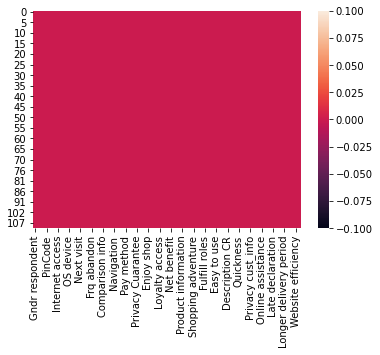

In [200]:
# Checking null values through heatmap visualization
sns.heatmap(ds.isnull())

# Getting the unique values of target columns

In [201]:
ds['Recommend retailer'].unique()

array(['Flipkart.com', 'Amazon.in, Myntra.com',
       'Amazon.in, Paytm.com, Myntra.com', 'Amazon.in, Flipkart.com',
       'Amazon.in, Paytm.com',
       'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com', 'Amazon.in',
       'Amazon.in, Flipkart.com, Myntra.com'], dtype=object)

# Checking the corelation

In [202]:
ds.corr()

,PinCode
PinCode,1.0


# Univariate Analysis

Histogram

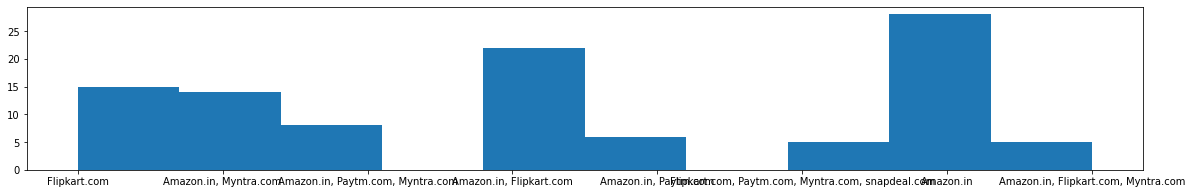

In [203]:
plt.figure(figsize=(20,3))
plt.hist(ds['Recommend retailer'])
plt.show()

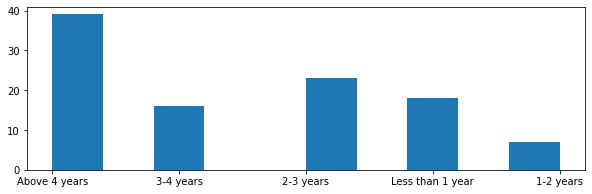

In [204]:
plt.figure(figsize=(10,3))
plt.hist(ds['Shopping period'])
plt.show()

It seems many customers are shopping since 4 years

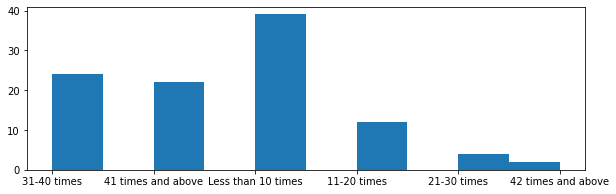

In [205]:
plt.figure(figsize=(10,3))
plt.hist(ds['Year purchase frq'])
plt.show()

many customers have purchased from the website less than 10 times in a year

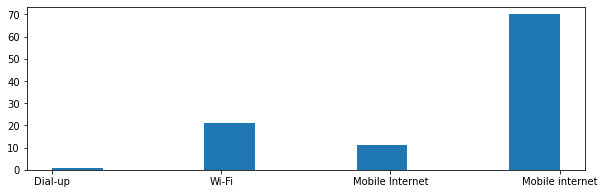

In [206]:
plt.figure(figsize=(10,3))
plt.hist(ds['Internet access'])
plt.show()

It seems many customers are using 'Mobile Internet' for shopping

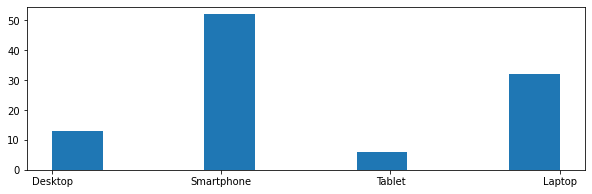

In [207]:
plt.figure(figsize=(10,3))
plt.hist(ds['Device shopping'])
plt.show()

Many customers are using 'Smartphone' for shopping

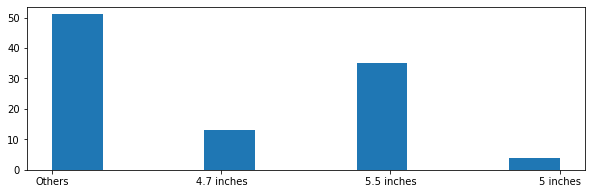

In [208]:
plt.figure(figsize=(10,3))
plt.hist(ds['Screen mobile'])
plt.show()

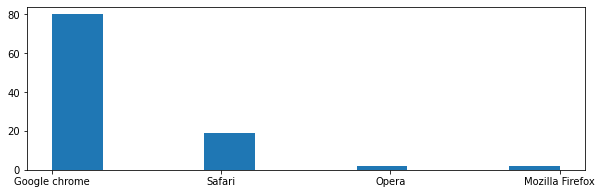

In [209]:
plt.figure(figsize=(10,3))
plt.hist(ds['Browser'])
plt.show()

It looks like many customers are using 'Google Chrome' as a browser for shopping

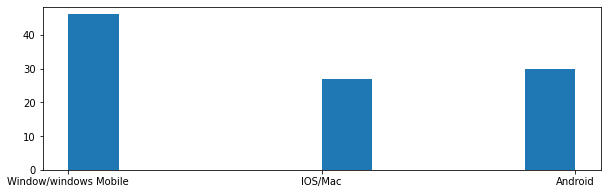

In [210]:
plt.figure(figsize=(10,3))
plt.hist(ds['OS device'])
plt.show()

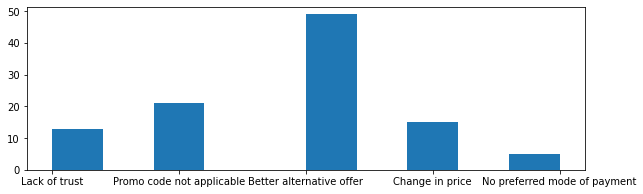

In [211]:
plt.figure(figsize=(10,3))
plt.hist(ds['Reason abandon'])
plt.show()

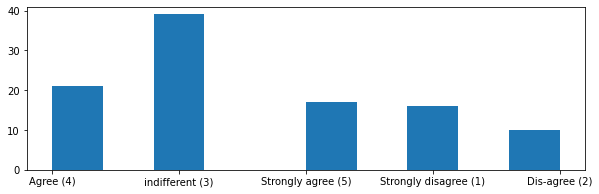

In [212]:
plt.figure(figsize=(10,3))
plt.hist(ds['Social status'])
plt.show()

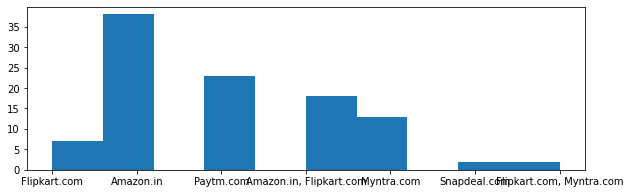

In [213]:
plt.figure(figsize=(10,3))
plt.hist(ds['Change design'])
plt.show()

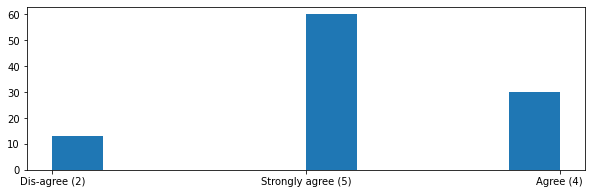

In [214]:
plt.figure(figsize=(10,3))
plt.hist(ds['Pay method'])
plt.show()

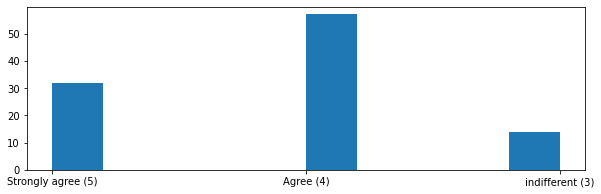

In [215]:
plt.figure(figsize=(10,3))
plt.hist(ds['Value for money'])
plt.show()

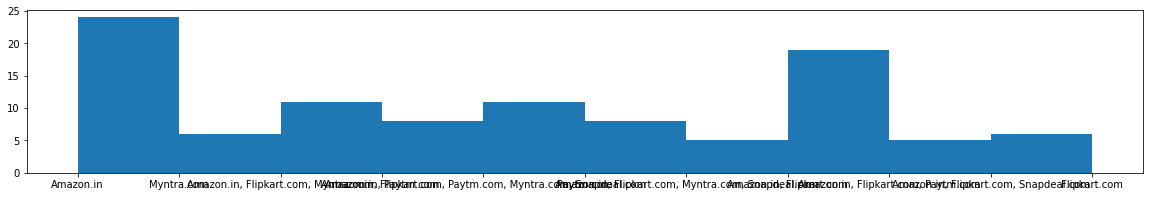

In [216]:
plt.figure(figsize=(20,3))
plt.hist(ds['Privacy cust_info'])
plt.show()

# Countplot

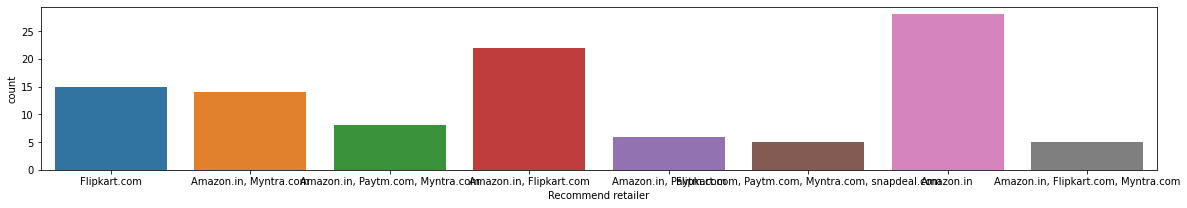

In [217]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Recommend retailer'])
plt.show()

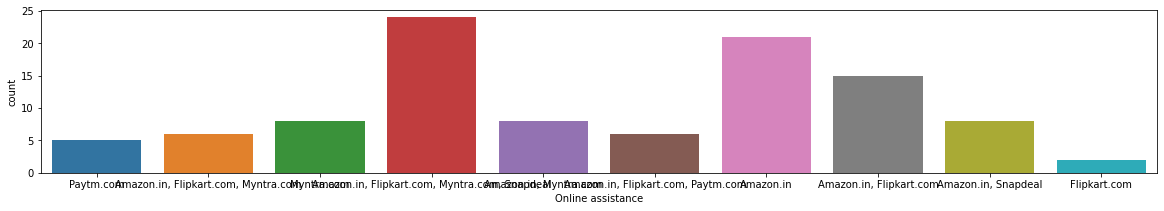

In [218]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Online assistance'])
plt.show()

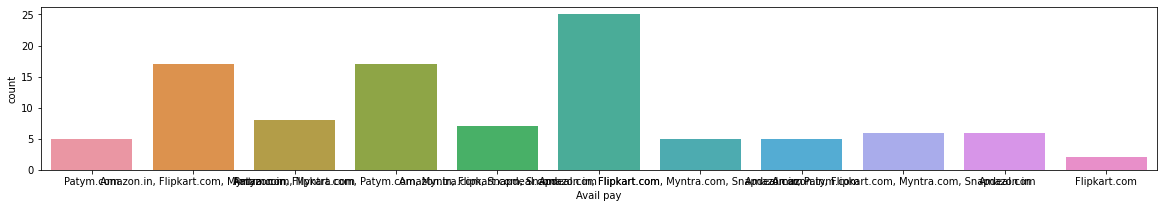

In [219]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Avail pay'])
plt.show()

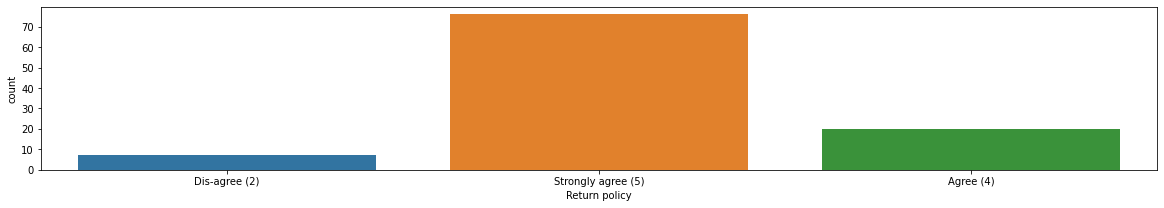

In [220]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Return policy'])
plt.show()

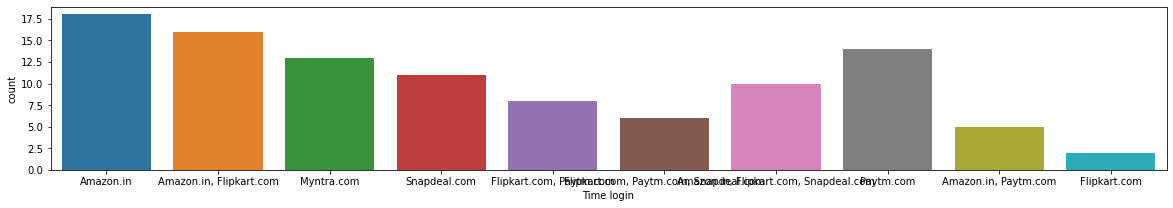

In [221]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Time login'])
plt.show()

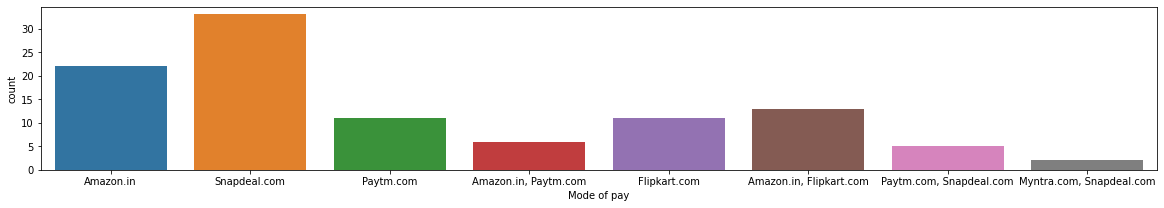

In [222]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Mode of pay'])
plt.show()

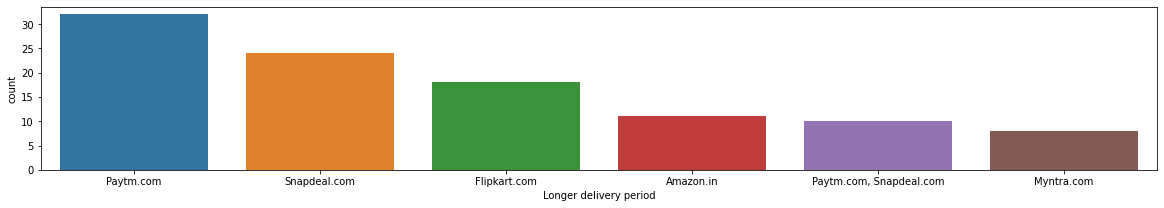

In [223]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Longer delivery period'])
plt.show()

Longer delivery period is of 'Paytm.com'

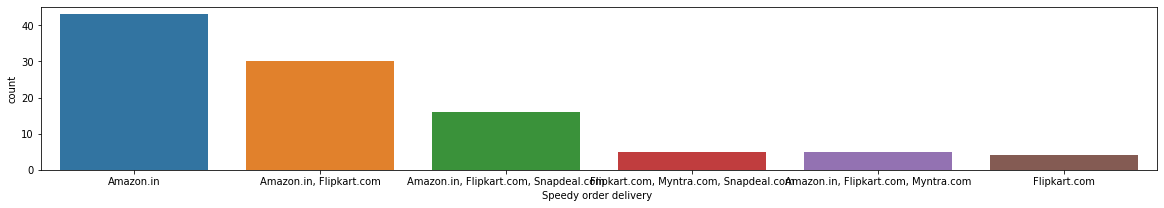

In [224]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Speedy order delivery '])
plt.show()

Speedy longer delivery is of 'Amazon'

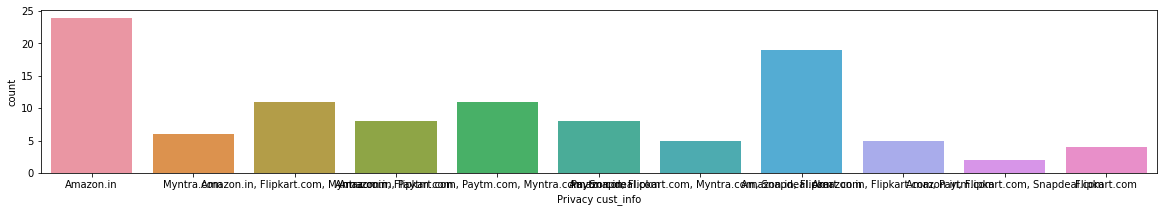

In [225]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Privacy cust_info'])
plt.show()

It looks like amazon has a good 'Customer policy information'

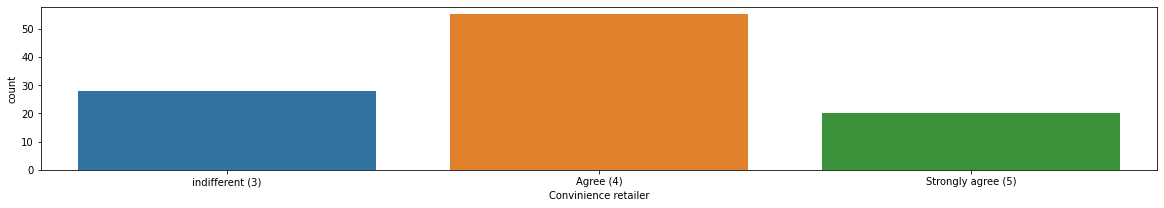

In [226]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Convinience retailer'])
plt.show()

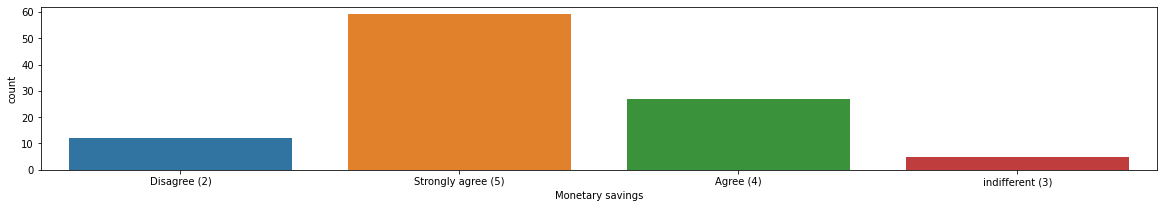

In [227]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Monetary savings'])
plt.show()

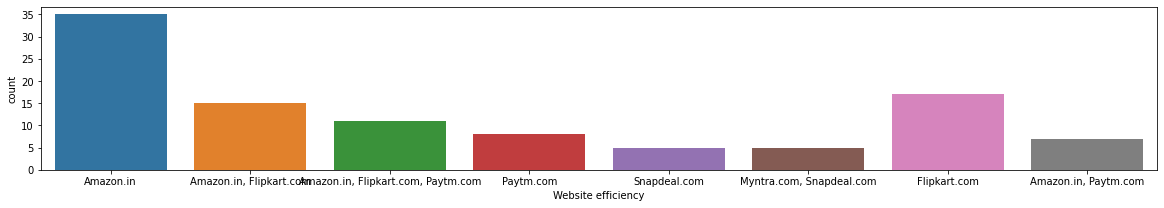

In [228]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Website efficiency'])
plt.show()

Amazon has good 'Website efficiency', it looks

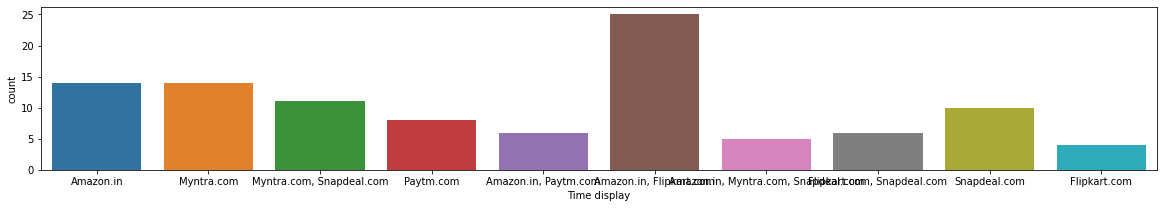

In [229]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Time display'])
plt.show()

# Bivariate Analysis

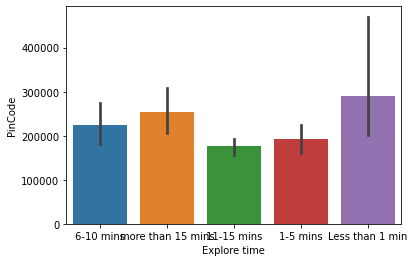

In [230]:
sns.barplot(x='Explore time', y='PinCode' , data=ds)
plt.show()

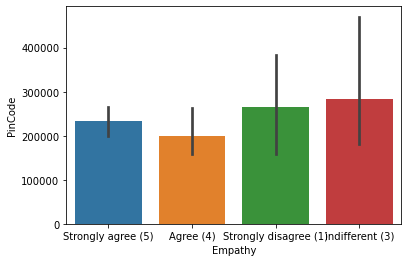

In [231]:
sns.barplot(x='Empathy', y='PinCode' , data=ds)
plt.show()

# JointPlot

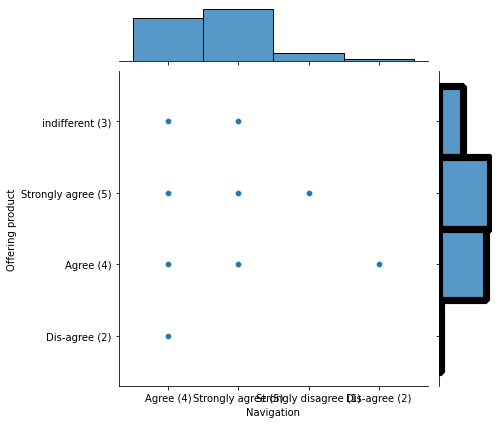

In [232]:
sns.jointplot(data=ds, x="Navigation", y="Offering product" )
plt.show()

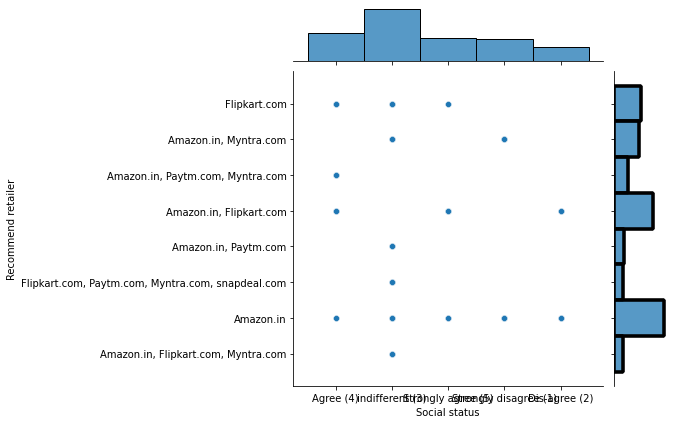

In [233]:
sns.jointplot(data=ds, x="Social status", y="Recommend retailer" )
plt.show()

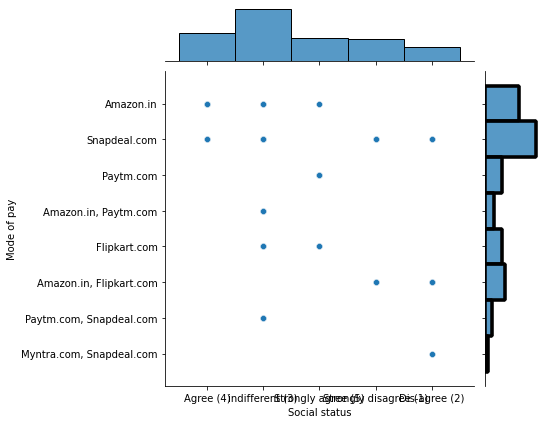

In [234]:
sns.jointplot(data=ds, x="Social status", y="Mode of pay" )
plt.show()

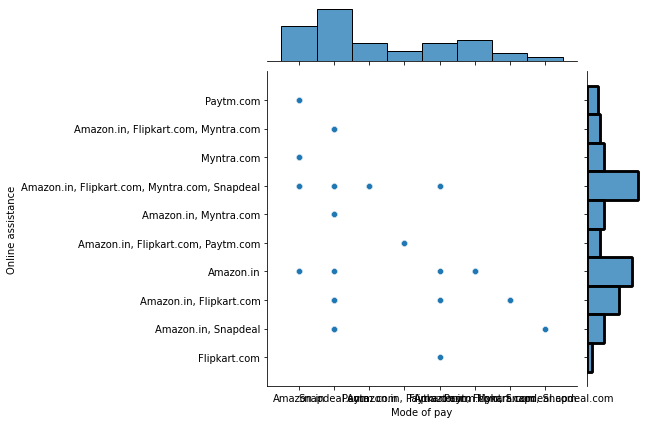

In [235]:
sns.jointplot(data=ds, x="Mode of pay", y="Online assistance" )
plt.show()

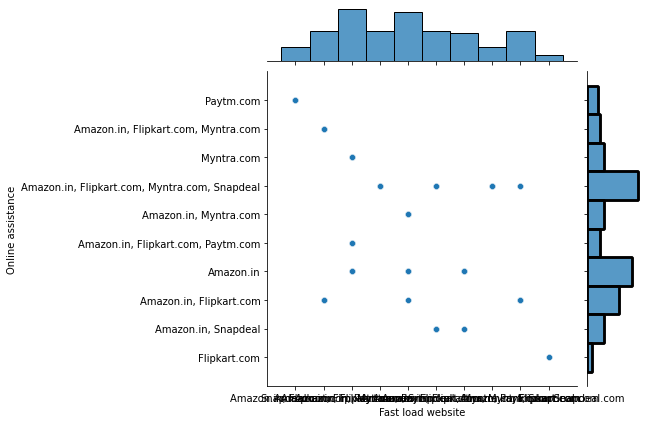

In [236]:
sns.jointplot(data=ds, x="Fast load website", y="Online assistance" )
plt.show()

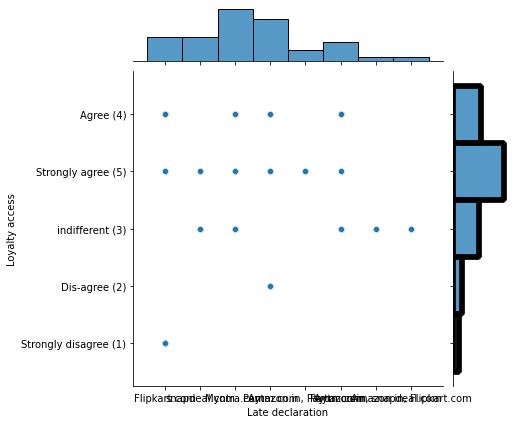

In [237]:
sns.jointplot(data=ds, x="Late declaration", y="Loyalty access" )
plt.show()

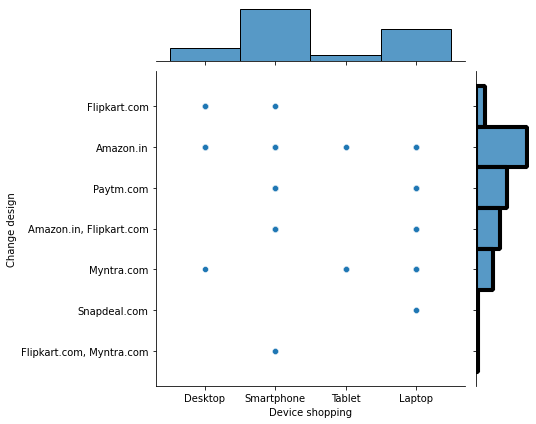

In [238]:
sns.jointplot(data=ds, x="Device shopping", y="Change design" )
plt.show()

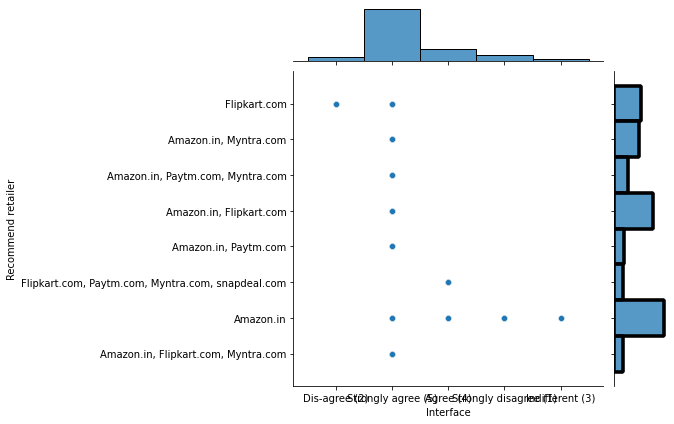

In [239]:
sns.jointplot(data=ds, x="Interface", y="Recommend retailer" )
plt.show()

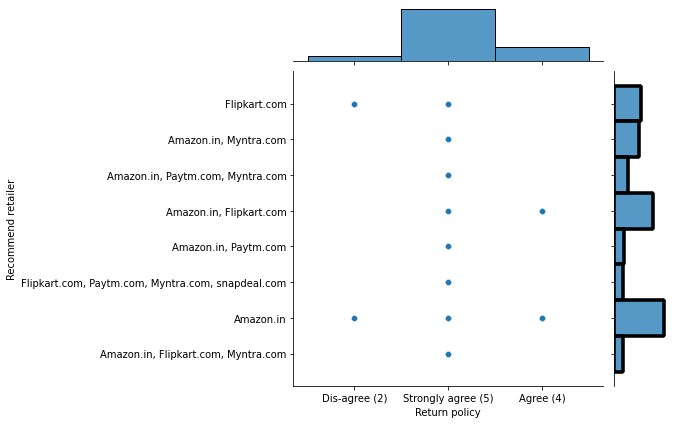

In [240]:
sns.jointplot(data=ds, x="Return policy", y="Recommend retailer" )
plt.show()

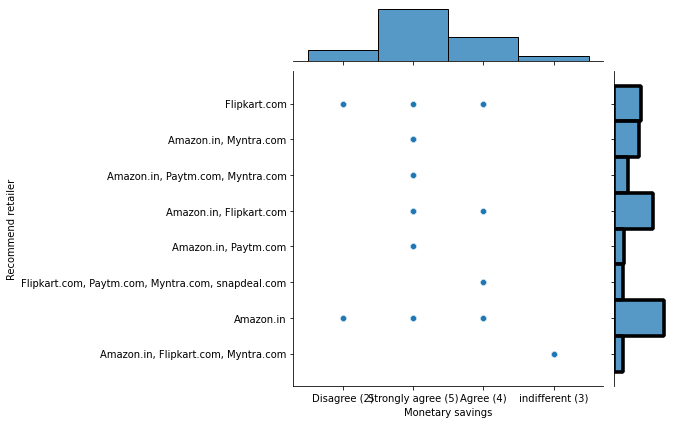

In [241]:
sns.jointplot(data=ds, x="Monetary savings", y="Recommend retailer" )
plt.show()

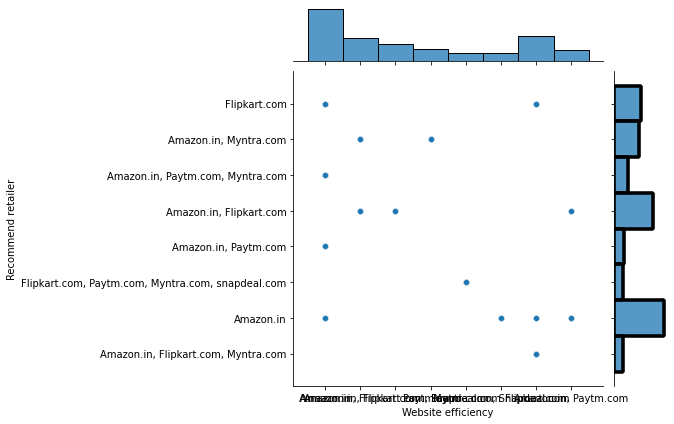

In [242]:
sns.jointplot(data=ds, x="Website efficiency", y="Recommend retailer" )
plt.show()

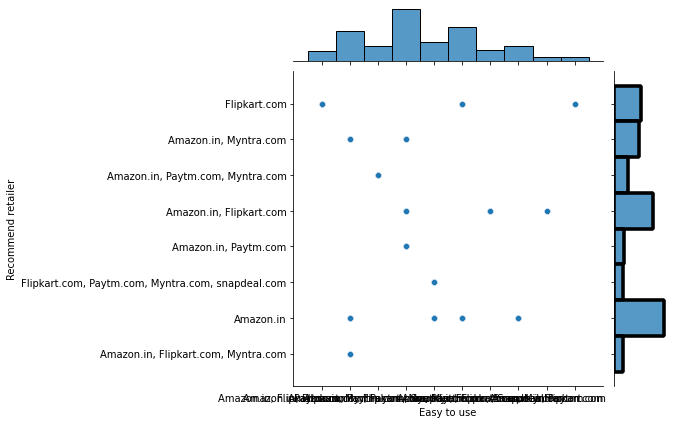

In [243]:
sns.jointplot(data=ds, x="Easy to use", y="Recommend retailer" )
plt.show()

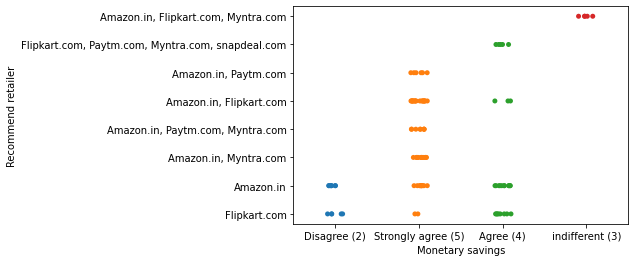

In [244]:
sns.stripplot(x='Monetary savings', y='Recommend retailer', data=ds)
plt.show()

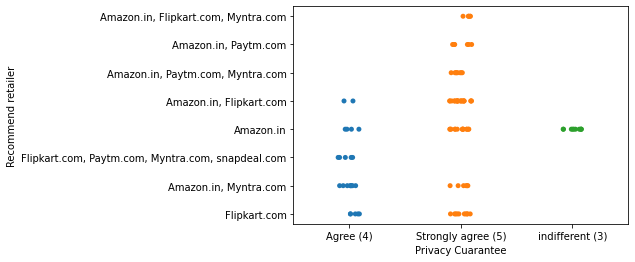

In [245]:
sns.stripplot(x='Privacy Cuarantee', y='Recommend retailer', data=ds)
plt.show()

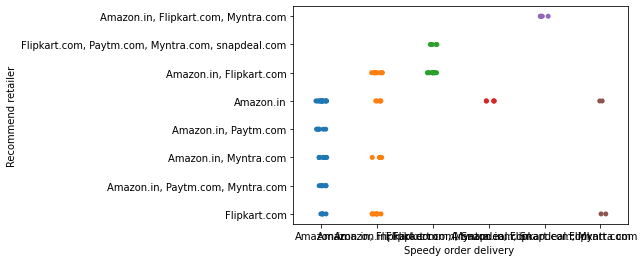

In [246]:
sns.stripplot(x='Speedy order delivery ', y='Recommend retailer', data=ds)
plt.show()

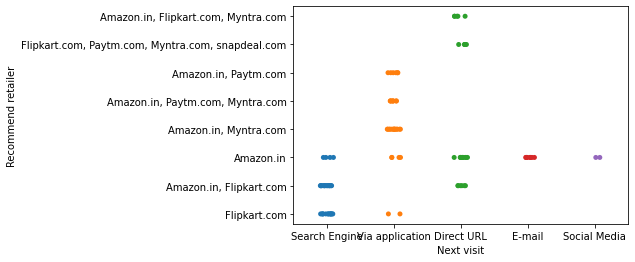

In [247]:
sns.stripplot(x='Next visit', y='Recommend retailer', data=ds)
plt.show()

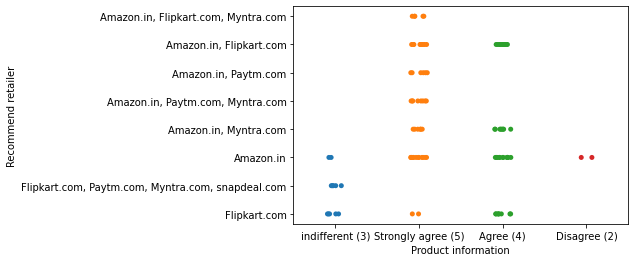

In [248]:
sns.stripplot(x='Product information', y='Recommend retailer', data=ds)
plt.show()

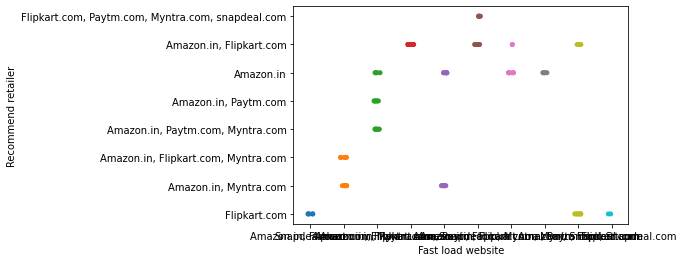

In [249]:
sns.stripplot(x='Fast load website', y='Recommend retailer', data=ds)
plt.show()

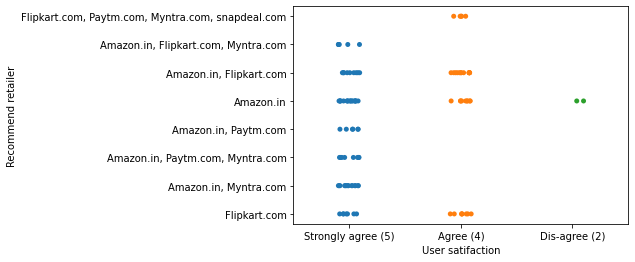

In [250]:
sns.stripplot(x='User satifaction', y='Recommend retailer', data=ds)
plt.show()

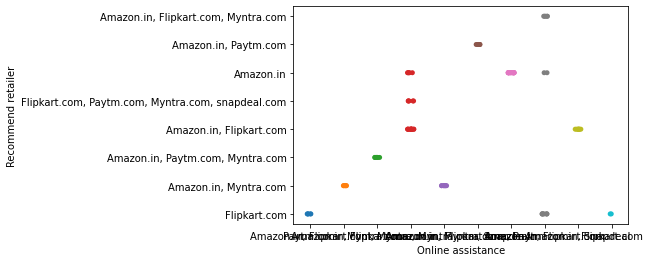

In [251]:
sns.stripplot(x='Online assistance', y='Recommend retailer', data=ds)
plt.show()

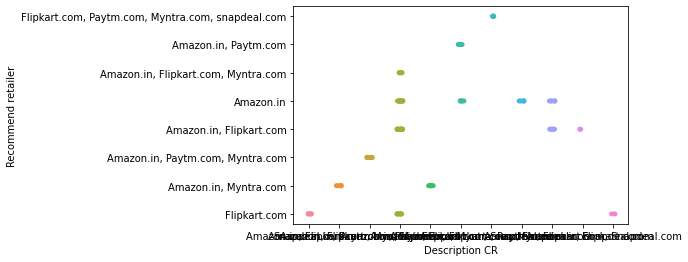

In [252]:
sns.stripplot(x='Description CR', y='Recommend retailer', data=ds)
plt.show()

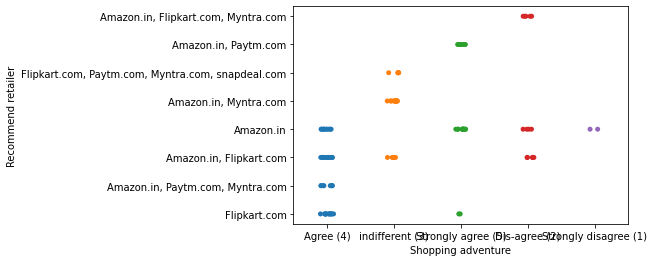

In [253]:
sns.stripplot(x='Shopping adventure', y='Recommend retailer', data=ds)
plt.show()

<Figure size 720x576 with 0 Axes>

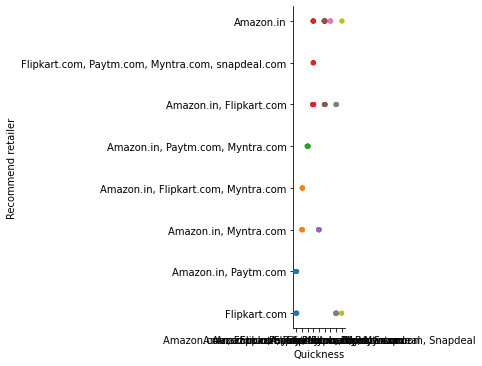

In [254]:
plt.figure(figsize=(10,8))
sns.catplot(x='Quickness', y='Recommend retailer' ,data=ds)
plt.show()

In [255]:
# using LabelEncoder to change categorical data to number data
le = LabelEncoder()
for i in ds_cat:
    ds[i] = le.fit_transform(ds[i].astype(str))

In [256]:
ds.replace(np.nan, 0, inplace=True)

# Classification algorithm for 'Recommend retailer'

# Removing outliers

In [257]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (103, 71)
After removing zscore:  (93, 71)


In [258]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['Recommend retailer'])
y = ds_final['Recommend retailer']

In [259]:
y.unique()

array([3, 5, 1, 4, 7, 0, 6])

In [260]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [261]:
(x.shape, y.shape)

((93, 70), (93,))

In [262]:
x.skew()

Gndr respondent           0.567373
Age                       0.650846
City shop                 0.269787
PinCode                   1.468258
Shopping period          -0.381091
                            ...   
Mode of pay               0.038686
Longer delivery period   -0.090434
Change design             0.305188
Frequent disruption      -0.017047
Website efficiency        0.638712
Length: 70, dtype: float64

In [263]:
# Remove skewness 
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.log1p(x[col])

In [264]:
x.skew()

Gndr respondent           0.567373
Age                       0.223315
City shop                 0.269787
PinCode                   0.266818
Shopping period          -0.381091
                            ...   
Mode of pay               0.038686
Longer delivery period   -0.090434
Change design             0.305188
Frequent disruption      -0.017047
Website efficiency       -0.356518
Length: 70, dtype: float64

In [265]:
x.head()

,Gndr respondent,Age,City shop,PinCode,Shopping period,Year purchase frq,Internet access,Device shopping,Screen mobile,OS device,...,Online assistance,Time login,Time display,Late declaration,Page time,Mode of pay,Longer delivery period,Change design,Frequent disruption,Website efficiency
0,-1.423478,NaN,-0.720318,-1.667937,0.567913,-0.077104,1.642330,0.579917,-2.093230,-0.076810,...,-0.538053,-1.018190,0.781441,1.705022,1.493903,1.200845,1.367415,-1.006101,0.253127,-0.850858
1,-1.423478,NaN,-0.097159,-0.241270,-0.270435,-0.077104,-1.994258,0.579917,-0.136744,-1.267357,...,1.702495,0.820483,0.781441,0.058997,0.408489,-1.249782,0.144630,1.356712,1.093870,NaN
2,0.840405,NaN,0.525999,-1.101613,-0.270435,1.118006,-1.994258,0.579917,-0.136744,-0.076810,...,-0.164628,1.433374,1.119460,0.058997,0.770294,0.500666,0.144630,-0.533538,-1.007987,-0.142236
3,-1.423478,NaN,-1.343476,1.076996,-1.108783,-1.869769,1.642330,0.579917,-2.093230,-0.076810,...,0.582221,0.207592,1.457479,0.607672,0.770294,1.200845,0.144630,-1.006101,1.514241,0.966561
4,-1.423478,-0.263004,1.460737,-0.241270,0.567913,-0.077104,1.642330,0.579917,-0.136744,-1.267357,...,0.208797,0.514037,-0.232615,-1.038353,-1.400534,-0.549603,-1.078154,1.356712,-0.587616,NaN


In [266]:
x.replace(np.nan, 0, inplace=True)

In [267]:
x.head()

,Gndr respondent,Age,City shop,PinCode,Shopping period,Year purchase frq,Internet access,Device shopping,Screen mobile,OS device,...,Online assistance,Time login,Time display,Late declaration,Page time,Mode of pay,Longer delivery period,Change design,Frequent disruption,Website efficiency
0,-1.423478,0.000000,-0.720318,-1.667937,0.567913,-0.077104,1.642330,0.579917,-2.093230,-0.076810,...,-0.538053,-1.018190,0.781441,1.705022,1.493903,1.200845,1.367415,-1.006101,0.253127,-0.850858
1,-1.423478,0.000000,-0.097159,-0.241270,-0.270435,-0.077104,-1.994258,0.579917,-0.136744,-1.267357,...,1.702495,0.820483,0.781441,0.058997,0.408489,-1.249782,0.144630,1.356712,1.093870,0.000000
2,0.840405,0.000000,0.525999,-1.101613,-0.270435,1.118006,-1.994258,0.579917,-0.136744,-0.076810,...,-0.164628,1.433374,1.119460,0.058997,0.770294,0.500666,0.144630,-0.533538,-1.007987,-0.142236
3,-1.423478,0.000000,-1.343476,1.076996,-1.108783,-1.869769,1.642330,0.579917,-2.093230,-0.076810,...,0.582221,0.207592,1.457479,0.607672,0.770294,1.200845,0.144630,-1.006101,1.514241,0.966561
4,-1.423478,-0.263004,1.460737,-0.241270,0.567913,-0.077104,1.642330,0.579917,-0.136744,-1.267357,...,0.208797,0.514037,-0.232615,-1.038353,-1.400534,-0.549603,-1.078154,1.356712,-0.587616,0.000000


# classification algorithm for dataset with target variable as 'Recommend retailer'

In [268]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [269]:
# algorithms used for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [270]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()

In [271]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTraeeClassifier', DT))
models.append(('RandomForestClassifier', RFC))


****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  44  is:  1.0
KNeighborsClassifier()
Predicted values:  [3 6 4 1 0 1 0 0 1 6 1 0 5 0 1 6 6 3 6]


Accuracy score:  1.0


cross val score:  0.9555555555555555


[0.         0.35714286 0.5        0.64285714 0.64285714 1.        ] [0. 0. 0. 0. 1. 1.] [7 6 4 3 1 0]
roc auc score:  0.3571428571428571


classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



[[5 0 0 0 0 0]
 [0 5 0 0 0 0]
 

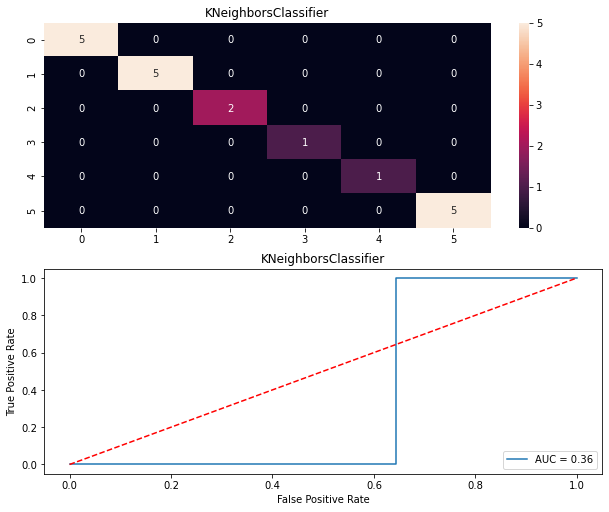

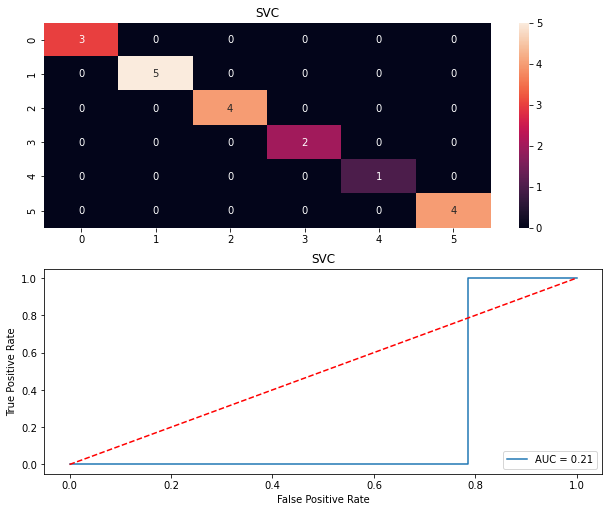

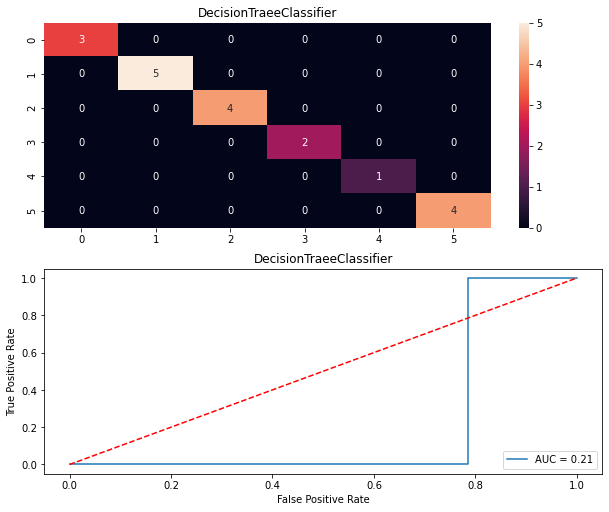

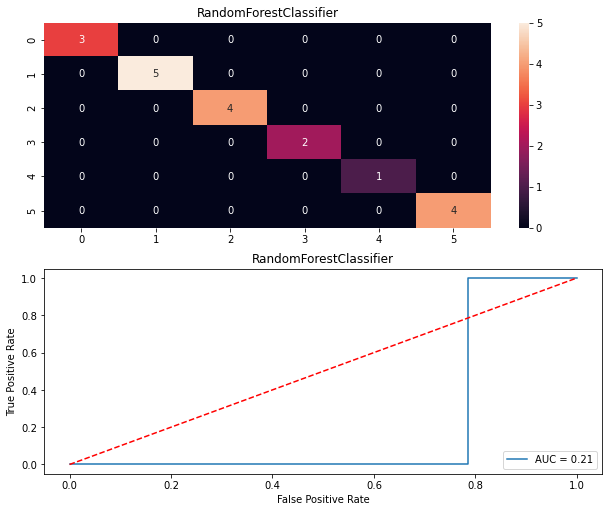

In [272]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .20)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [273]:
# Displaying the data in tabular form
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

,Model,Accuracy_Score,Cross Val Score,ROC_AUC_Curve,RandomState
0,KNeighborsClassifier,100.0,95.555556,35.714286,44
1,SVC,100.0,100.000000,21.428571,42
2,DecisionTraeeClassifier,100.0,98.888889,21.428571,42
3,RandomForestClassifier,100.0,100.000000,21.428571,42


In [274]:
#Using the best model for gridsearchcv

parameters = { 'C' : [0.001, 0.01, 0.0001, 1, 10], 'kernel' : ['poly', 'rbf', 'linear'], 'gamma': [1,0.1, 0.01]}

gsc = GridSearchCV(estimator = SV, param_grid = parameters, cv=10)

In [275]:
gsc.fit(x,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.0001, 1, 10],
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly', 'rbf', 'linear']})

In [276]:
gsc.best_params_

{'C': 0.001, 'gamma': 1, 'kernel': 'poly'}

In [277]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=68, test_size = 0.20)
svc = SVC(C= 0.001, gamma= 1, kernel= 'poly' )
svc.fit(x_train, y_train)
y_pred =  svc.predict(x_test)
print (y_pred)

[6 3 5 0 6 0 7 1 6 5 6 4 1 3 0 0 0 0 3]


We need to predict the 'Recommended retailer'.

In [278]:
# Saving the predicted values in csv files
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_recommend_retailer.csv')

accuracy score:  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Confusion_matrix:  [[6 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 4 0]
 [0 0 0 0 0 0 1]]
cross val score:  1.0
roc auc score:  0.3529411764705882
AxesSubplot(0.125,0.808774;0.62x0.0712264)





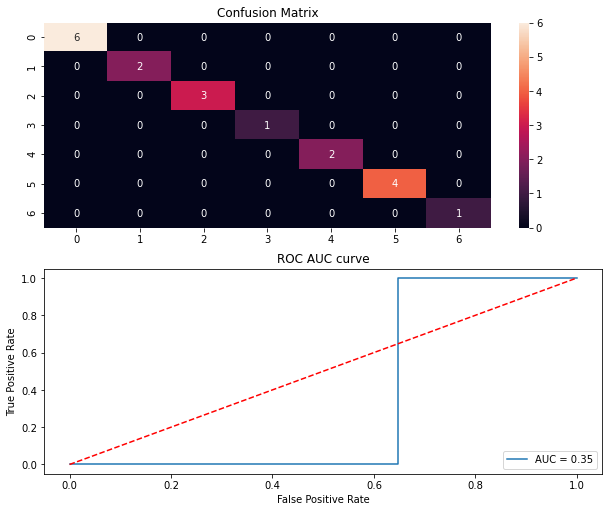

In [279]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(svc, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [280]:
# saving the model 
import joblib
joblib.dump(svc, 'project_recommend_retailer.pkl')
#clf = joblib.load('project_recommend_retailer.pkl')
#clf.predict(x_test)

['project_recommend_retailer.pkl']